In [5]:
import pandas as pd
import os


relative_data_path = '../../data/raw/' 
file_name = 'X01_범죄 피해자.csv' # ⚠️ 컴퓨터에서 변경한 가장 단순한 이름으로 가정
file_path = os.path.join(relative_data_path, file_name)

# 2. CSV 파일 읽기
try:
    df_victim = pd.read_csv(file_path, encoding='utf-8')
    
    # 데이터가 잘 불러와졌는지 확인하기 위해 상위 5개 행을 출력
    print("데이터 불러오기 성공!")
    print(df_victim.head())
    
except FileNotFoundError:
    print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 파일 경로와 이름을 다시 확인해주세요.")
except Exception as e:
    # 한글 인코딩 문제로 오류가 날 경우를 대비한 추가 처리
    print(f"다른 인코딩으로 재시도 중... 현재 오류: {e}")
    try:
        df_victim = pd.read_csv(file_path, encoding='cp949') # 윈도우 기본 인코딩
        print("데이터 불러오기 성공 (cp949)")
        print(df_victim.head())
    except:
        print("파일 불러오기에 실패했습니다. 파일이 깨졌거나 인코딩 문제가 심각합니다.")

데이터 불러오기 성공!
  범죄유형         성별  2020  2021  2022  2023  2024
0          살인   계   724   658   702   770   772
1          살인  남성   416   381   407   443   436
2          살인  여성   285   269   293   327   336
3          강도   계   663   495   516   573   457
4          강도  남성   367   260   298   324   270


In [6]:
display(df_victim)

,범죄유형,성별,2020,2021,2022,2023,2024
0,살인,계,724,658,702,770,772
1,살인,남성,416,381,407,443,436
2,살인,여성,285,269,293,327,336
3,강도,계,663,495,516,573,457
4,강도,남성,367,260,298,324,270
5,강도,여성,277,224,218,248,187
6,강간,계,6136,6076,6414,6028,5674
7,강간,남성,117,124,158,132,136
8,강간,여성,5987,5899,6226,5896,5538
9,강제 추행,계,15344,14201,15864,16189,15377


In [7]:
## ⚠️ df_victim이 네가 지금 사용하는 데이터프레임이라고 가정

# 1. iloc을 사용하여 위치 기반으로 컬럼 선택 (0부터 6까지 총 7개 컬럼)
# 컬럼 이름이 무엇이든 상관없이 위치만 보고 뽑아옴
df_victim_temp = df_victim.iloc[:, 0:7]

# 2. 새로운 컬럼 이름 지정
new_column_names = ['범죄유형', '성별', 2020, 2021, 2022, 2023, 2024]
df_victim_temp.columns = new_column_names

# 3. Long Format으로 변환 (이전 코드 재사용)
df_long_format = pd.melt(
    df_victim_temp,
    id_vars=['범죄유형', '성별'],  # 이 컬럼들은 고정
    var_name='발생년도',        # 년도를 '발생년도' 컬럼으로 모음
    value_name='건수'          # 해당 값을 '건수' 컬럼으로 모음
)

# 4. 데이터 타입 정리
df_long_format['건수'] = pd.to_numeric(df_long_format['건수'], errors='coerce')
df_long_format.dropna(subset=['건수'], inplace=True) 

print("✅ iloc과 melt를 이용한 Long Format 변환 완료!")
print(df_long_format.head(10))

✅ iloc과 melt를 이용한 Long Format 변환 완료!
    범죄유형  성별  발생년도     건수
0     살인   계  2020    724
1     살인  남성  2020    416
2     살인  여성  2020    285
3     강도   계  2020    663
4     강도  남성  2020    367
5     강도  여성  2020    277
6     강간   계  2020   6136
7     강간  남성  2020    117
8     강간  여성  2020   5987
9  강제 추행   계  2020  15344


/var/folders/yt/2r0z55_978z15gtx5djp1y1w0000gn/T/ipykernel_6094/631414718.py:37: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/2r0z55_978z15gtx5djp1y1w0000gn/T/ipykernel_6094/631414718.py:37: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/2r0z55_978z15gtx5djp1y1w0000gn/T/ipykernel_6094/631414718.py:37: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/2r0z55_978z15gtx5djp1y1w0000gn/T/ipykernel_6094/631414718.py:37: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/2r0z55_978z15gtx5djp1y1w0000gn/T/ipykernel_6094/631414718.py:37: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/yt/2r0z55_978z15gtx5djp1y1w0000gn/T/ipykernel_609

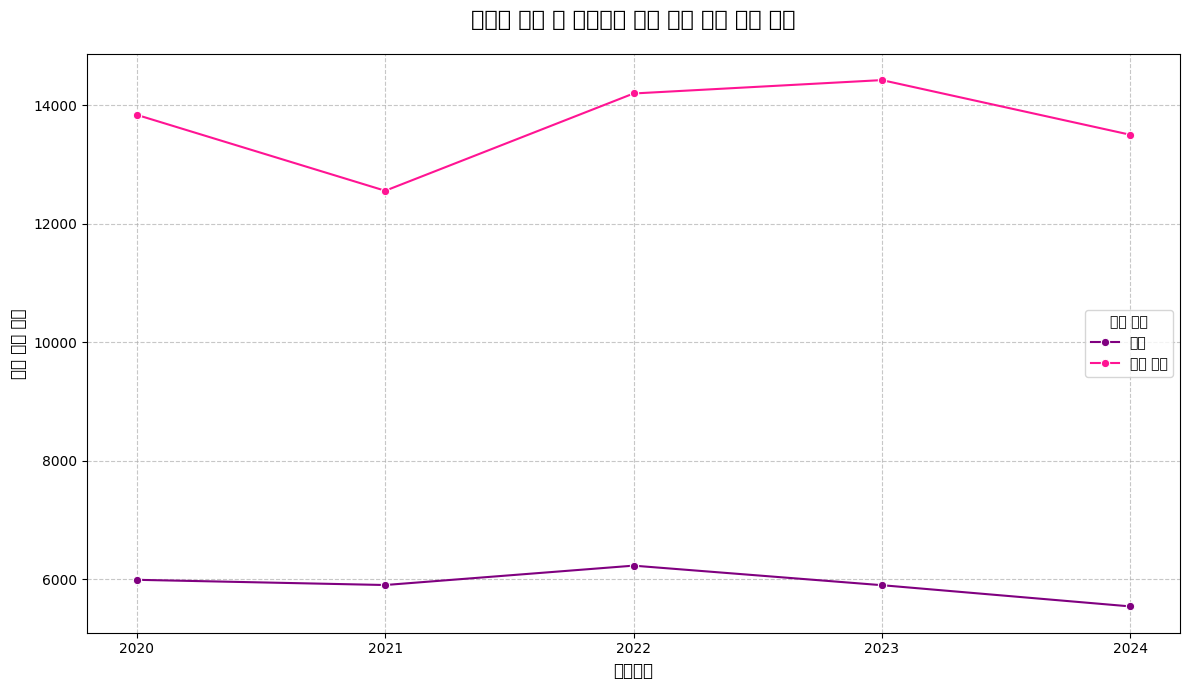

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# df_long_format (네가 방금 만든 데이터) 사용 가정

# 1. 시각화 대상 필터링: 강간/강제추행 + 여성 피해자
df_target = df_long_format[
    (df_long_format['범죄유형'].isin(['강간', '강제 추행'])) & 
    (df_long_format['성별'] == '여성')
].copy()

# 2. 발생년도를 숫자로 변환 (시각화 축 정렬 위함)
df_target['발생년도'] = pd.to_numeric(df_target['발생년도'])

# 3. 꺾은선 그래프 생성
plt.figure(figsize=(12, 7))

# seaborn을 사용하여 '범죄유형'별로 선을 분리하여 변화 추이를 그림
sns.lineplot(
    data=df_target,
    x='발생년도',
    y='건수',
    hue='범죄유형', # 강간 vs. 강제 추행 별로 다른 선
    marker='o',
    palette=['purple', 'deeppink'] # 색상 지정
)

# 4. 제목 및 축 설정 (가독성 UP!)
plt.title('년도별 강간 및 강제추행 여성 피해 건수 변화 추이', fontsize=16, pad=20)
plt.xlabel('발생년도', fontsize=12)
plt.ylabel('여성 피해 건수', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(df_target['발생년도'].unique(), rotation=0) # X축 년도를 명확히 표시
plt.legend(title='범죄 유형')
plt.tight_layout()
plt.show() # ```


In [ ]:
# 5. 처리된 데이터를 저장할 경로 설정
processed_data_path = '../../data/preprocessing/'
processed_file_name = 'X01_범죄 피해자_long.csv'
processed_file_path = os.path.join(processed_data_path, processed_file_name)

# 폴더가 없을 경우 자동으로 생성
os.makedirs(processed_data_path, exist_ok=True)

# CSV 파일로 저장
df_long_format.to_csv(processed_file_path, index=False, encoding='utf-8-sig')

print(f"✅ 처리된 파일이 저장되었습니다: {processed_file_path}")

✅ 처리된 파일이 저장되었습니다: ../../data/processing/X01_범죄 피해자_long.csv
